In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4577,4578,15703979,Evans,580,Germany,Male,39,3,119688.81,1,1,0,137041.26,0
2298,2299,15614034,Martin,607,Germany,Male,61,2,164523.50,2,1,1,35786.76,0
5651,5652,15766272,Folliero,521,Germany,Female,61,0,125193.96,1,1,1,109356.53,0
1665,1666,15775082,Stewart,749,France,Male,42,1,129776.72,2,0,1,143538.51,0
6180,6181,15734892,Fennell,579,Spain,Male,37,4,0.00,2,1,1,32246.63,0


In [2]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6892,649,France,Female,56,8,156974.26,1,1,0,89405.26,1
1881,530,Spain,Female,36,2,0.00,2,1,1,14721.80,0
7572,586,Germany,Male,37,8,167735.69,2,0,1,104665.79,0
2476,451,Germany,Female,38,9,61482.47,1,1,1,167538.66,0
758,633,France,Female,37,9,156091.97,1,1,0,72008.61,0


In [3]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
columns_names = ['CreditScore',	'Geography',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	
                'EstimatedSalary',	'Exited']

In [26]:
for col_name in columns_names:
    if df[col_name].isnull().any():
        print(f'{col_name} null here')
    else:
        print(f'{col_name}  no null here')

CreditScore  no null here
Geography  no null here
Gender  no null here
Age  no null here
Tenure  no null here
Balance  no null here
NumOfProducts  no null here
HasCrCard  no null here
IsActiveMember  no null here
EstimatedSalary  no null here
Exited  no null here


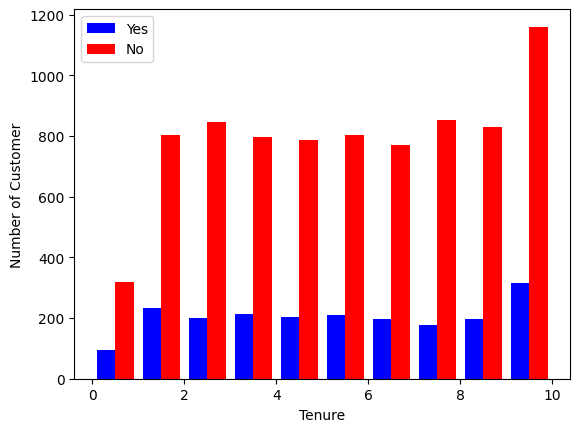

In [30]:
tenure_no = df[df.Exited == 0].Tenure
tenure_yes = df[df.Exited == 1].Tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customer')


plt.hist([tenure_yes, tenure_no], color=['blue', 'red'], label=['Yes', 'No'])
plt.legend()

In [31]:
df.Gender.replace({'Female' :  1, 'Male' : 0}, inplace=True)
df.sample(5)

C:\Users\arief\AppData\Local\Temp\ipykernel_12636\3980031047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Gender.replace({'Female' :  1, 'Male' : 0}, inplace=True)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5357,405,Germany,0,31,5,133299.67,2,1,1,72950.14,0
9971,833,France,1,34,3,144751.81,1,0,0,166472.81,0
4980,628,Germany,0,38,10,113525.84,1,1,0,46044.48,1
5259,582,France,0,52,2,151457.88,1,0,1,40893.61,0
3608,677,France,1,36,7,0.00,1,1,0,47318.75,0


In [33]:
df1 = pd.get_dummies(data=df, columns=['Geography'], dtype=int)
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8237,649,0,39,3,113096.41,1,1,1,60335.24,0,1,0,0
4648,689,1,57,4,0.00,2,1,0,136649.80,1,0,0,1
4831,660,0,35,7,0.00,2,1,0,13218.60,0,1,0,0
8733,749,0,42,9,222267.63,1,0,0,101108.85,1,0,0,1
9553,646,0,38,7,0.00,2,1,0,1528.40,0,1,0,0


In [34]:
df1.shape

(10000, 13)

In [35]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object

In [36]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale]) 
    

In [37]:
for cols in cols_to_scale:
    print(f'{cols} : {df1[cols].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [38]:
X = df1.drop('Exited', axis='columns')
y = df1.Exited

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

In [45]:
X_train.shape

(8000, 12)

In [46]:
y_train[:10]

5291    0
8771    0
35      1
1255    0
3266    0
6352    0
6691    0
863     0
5566    0
158     0
Name: Exited, dtype: int64

In [51]:
model = keras.Sequential([
        keras.layers.Dense(100, input_shape=(12,), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 10s 23ms/step - loss: 0.4866 - accuracy: 0.7962
Epoch 2/100
250/250 [==============================] - 6s 24ms/step - loss: 0.4506 - accuracy: 0.8070
Epoch 3/100
250/250 [==============================] - 8s 31ms/step - loss: 0.4340 - accuracy: 0.8145
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4222 - accuracy: 0.8167
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4096 - accuracy: 0.8213
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3981 - accuracy: 0.8306
Epoch 7/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3878 - accuracy: 0.8370
Epoch 8/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3768 - accuracy: 0.8381
Epoch 9/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3692 - accuracy: 0.8443
Epoch 10/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3634 - ac

In [52]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 12ms/step - loss: 0.3413 - accuracy: 0.8650


[0.34132450819015503, 0.8650000095367432]

In [56]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 3ms/step


array([[0.17907408],
       [0.02141889],
       [0.6782438 ],
       [0.27828348],
       [0.05564157]], dtype=float32)

In [57]:
y_test[:5]

5876    0
6555    0
1448    1
3351    0
231     0
Name: Exited, dtype: int64

In [58]:
y_pred = []

for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [59]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]

In [60]:
y_test[:10]

5876    0
6555    0
1448    1
3351    0
231     0
1204    0
1911    0
9648    0
8438    1
7541    0
Name: Exited, dtype: int64

In [62]:
yp[7]

array([0.5035783], dtype=float32)

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1605
           1       0.72      0.51      0.60       395

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000



In [81]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1527,   78],
       [ 192,  203]])>

Text(95.72222222222221, 0.5, 'Truth')

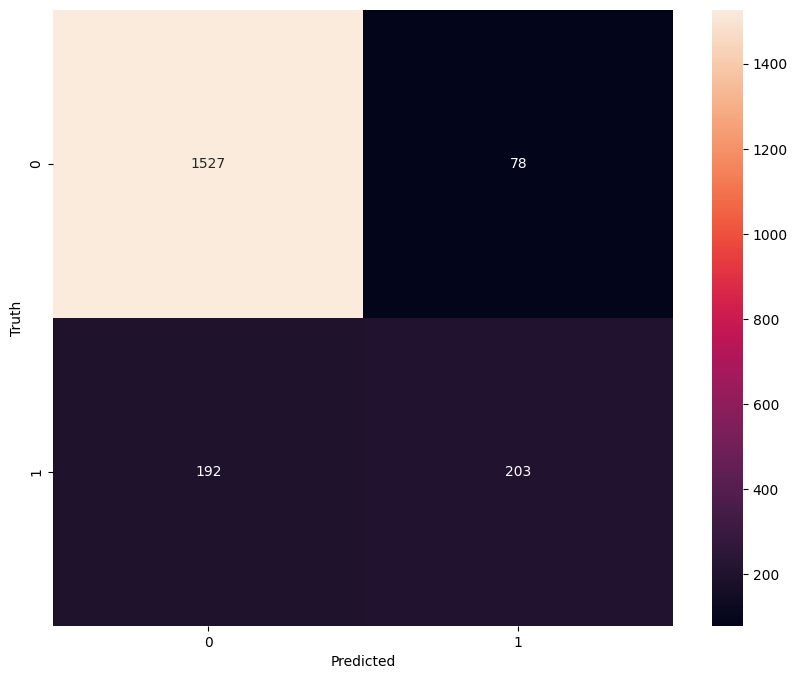

In [82]:
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')